In [5]:
!pip install pandas numpy matplotlib seaborn

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Load the Excel file
file_path = 'insurance_claims.xlsx'
xls = pd.ExcelFile(file_path)

# Display sheet names
print(xls.sheet_names)

# Read the main sheet
df = xls.parse('insurance_claims')

# Display the first few rows to understand the structure
df.head()

# Show basic information about the dataset
df.info()

# Get summary statistics for numerical columns
df.describe()


['insurance_claims']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int64         
 1   age                          1000 non-null   int64         
 2   policy_number                1000 non-null   int64         
 3   policy_bind_date             1000 non-null   datetime64[ns]
 4   policy_state                 1000 non-null   object        
 5   policy_csl                   1000 non-null   object        
 6   policy_deductable            1000 non-null   int64         
 7   policy_annual_premium        1000 non-null   float64       
 8   umbrella_limit               1000 non-null   int64         
 9   insured_zip                  1000 non-null   int64         
 10  insured_sex                  1000 non-null   object        
 11  insured_education_level

,months_as_customer,age,policy_number,policy_bind_date,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,...,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,2002-02-08 04:40:47.999999872,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,...,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
min,0.000000,19.000000,100804.000000,1990-01-08 00:00:00,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,...,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,1995-09-19 00:00:00,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,...,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,2002-04-01 12:00:00,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,...,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2008-04-21 12:00:00,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,...,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2015-02-22 00:00:00,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,...,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN
std,115.113174,9.140287,257063.005276,NaN,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,...,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN


In [16]:
df.isnull().sum()


months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [20]:
df.loc[:, 'authorities_contacted'] = df['authorities_contacted'].fillna('Unknown')




In [24]:
df.drop(columns=['_c39'], inplace=True, errors='ignore')



In [26]:
# Check if there are still missing values
df.isnull().sum()


months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [28]:
columns_to_drop = ['insured_zip', 'capital-gains', 'capital-loss', 'policy_number']
df.drop(columns=columns_to_drop, inplace=True)


In [30]:
# Calculate Total Claims
df['total_claims'] = df['injury_claim'] + df['property_claim'] + df['vehicle_claim']


In [32]:
# Calculate Policy Duration (Days as Customer)
df['days_as_customer'] = (df['incident_date'] - df['policy_bind_date']).dt.days


In [34]:
# Flag High-Risk Claims (Above Median)
df['high_risk'] = (df['total_claim_amount'] > df['total_claim_amount'].median()).astype(int)


In [36]:
# Incident Severity Encoding
severity_mapping = {'Minor Damage': 1, 'Major Damage': 2, 'Total Loss': 3, 'Trivial Damage': 0}
df['incident_severity'] = df['incident_severity'].map(severity_mapping)


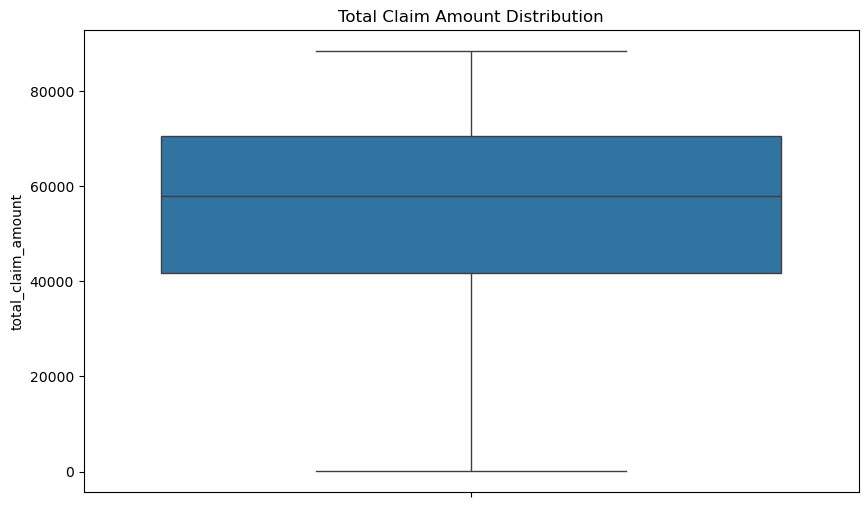

In [42]:
#Outlier Detection and Treatment 
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(df['total_claim_amount'])
plt.title('Total Claim Amount Distribution')
plt.show()

upper_limit = np.percentile(df['total_claim_amount'], 95)
df['total_claim_amount'] = np.where(df['total_claim_amount'] > upper_limit, upper_limit, df['total_claim_amount'])


In [44]:
df.to_csv('cleaned_insurance_claims.csv', index=False)
